In [2]:
!pip install imbalanced-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE  # Import SMOTE
from sklearn.impute import SimpleImputer

In [3]:
# Load datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

In [4]:
print('Train Set:',train_df.shape,'\nTest Set:',test_df.shape)

Train Set: (614, 13) 
Test Set: (367, 12)


In [5]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
if 'Unnamed: 0' in train_df.columns:
    train_df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
train_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [11]:
test_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP002989,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [12]:
train_df.drop('Loan_ID',axis=1,inplace=True)
test_df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
train_df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [13]:
test_df.isnull().sum()

,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6
Credit_History,29


In [14]:
train_df.shape[0] - train_df.dropna().shape[0]

134

In [15]:
train_df[train_df.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [16]:
test_df[test_df.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,NaN,No,0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,NaN,No,1,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,NaN,No,0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,NaN,Yes,1,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [17]:
train_df.Gender.value_counts()

,count
Gender,
Male,489
Female,112


In [19]:
mode_gender=train_df.Gender.mode()[0]
print(mode_gender)
train_df.Gender.fillna(mode_gender,inplace=True)
test_df.Gender.fillna(mode_gender,inplace=True)

Male


In [20]:
print(train_df.loc[59])
print(test_df.loc[66])

Gender                       Male
Married                       Yes
Dependents                      2
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              3357
CoapplicantIncome          2859.0
LoanAmount                  144.0
Loan_Amount_Term            360.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     Y
Name: 59, dtype: object
Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              4700
CoapplicantIncome               0
LoanAmount                  135.0
Loan_Amount_Term            360.0
Credit_History                0.0
Property_Area           Semiurban
Name: 66, dtype: object


In [21]:
train_df[train_df.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [22]:
test_df[test_df.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [23]:
mode_married=train_df.Married.mode()[0]
print(mode_married)

Yes


In [25]:
train_df.Married.fillna(mode_married,inplace=True)
test_df.Married.fillna(mode_married,inplace=True)

<ipython-input-25-a206018d0c8e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df.Married.fillna(mode_married,inplace=True)


In [26]:
train_df.loc[41]

,41
Gender,Male
Married,No
Dependents,0
Education,Graduate
Self_Employed,No
ApplicantIncome,1800
CoapplicantIncome,1213.0
LoanAmount,47.0
Loan_Amount_Term,360.0
Credit_History,1.0


In [27]:
test_df.loc[29]

,29
Gender,Male
Married,No
Dependents,0
Education,Graduate
Self_Employed,No
ApplicantIncome,2942
CoapplicantIncome,2382
LoanAmount,125.0
Loan_Amount_Term,180.0
Credit_History,1.0


In [28]:
train_df[train_df.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [29]:
test_df[test_df.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,Male,Yes,NaN,Not Graduate,No,4163,1475,162.0,360.0,1.0,Urban
70,Female,No,NaN,Graduate,No,3250,0,95.0,360.0,1.0,Semiurban
111,Male,Yes,NaN,Graduate,No,4082,0,93.0,360.0,1.0,Semiurban
138,Male,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
202,Male,Yes,NaN,Graduate,No,3016,1300,100.0,360.0,NaN,Urban
247,Male,Yes,NaN,Graduate,No,10000,0,NaN,360.0,1.0,Urban
251,Male,Yes,NaN,Graduate,No,3863,0,70.0,300.0,1.0,Semiurban
265,Male,No,NaN,Graduate,No,3579,3308,138.0,360.0,NaN,Semiurban
302,Female,No,NaN,Graduate,Yes,14987,0,177.0,360.0,1.0,Rural
312,Male,No,NaN,Graduate,No,2066,2108,104.0,84.0,1.0,Urban


In [30]:
train_df.Dependents.value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [31]:
mode_Dependents=train_df.Dependents.mode()[0]
print(mode_Dependents)

0


In [33]:
train_df.Dependents.fillna(mode_Dependents,inplace=True)
test_df.Dependents.fillna(mode_Dependents,inplace=True)

In [34]:
print(train_df.loc[11])
print(test_df.loc[26])

Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed             NaN
ApplicantIncome          2500
CoapplicantIncome      1840.0
LoanAmount              109.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 11, dtype: object
Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed              No
ApplicantIncome          4363
CoapplicantIncome        1250
LoanAmount              140.0
Loan_Amount_Term        360.0
Credit_History            NaN
Property_Area           Urban
Name: 26, dtype: object


In [35]:
train_df[train_df.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [36]:
test_df[test_df.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,Male,Yes,1,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
13,Male,Yes,2,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
36,Male,Yes,2,Graduate,NaN,7350,4029,185.0,180.0,1.0,Urban
72,Male,Yes,1,Graduate,NaN,4083,1775,139.0,60.0,1.0,Urban
89,Female,No,0,Graduate,NaN,5058,0,200.0,360.0,1.0,Rural
142,Male,Yes,3+,Not Graduate,NaN,6794,528,139.0,360.0,0.0,Urban
161,Male,No,0,Graduate,NaN,2964,0,84.0,360.0,0.0,Semiurban
168,Female,Yes,3+,Graduate,NaN,1750,2935,94.0,360.0,0.0,Semiurban
175,Male,Yes,2,Graduate,NaN,4912,4614,160.0,360.0,1.0,Rural


In [37]:
mode_Self_Employed=train_df.Self_Employed.mode()[0]
print(mode_Self_Employed)

No


In [38]:
train_df.Self_Employed.fillna(mode_Self_Employed,inplace=True)
test_df.Self_Employed.fillna(mode_Self_Employed,inplace=True)

print(train_df.loc[39])
print(test_df.loc[42])

Gender                       Male
Married                        No
Dependents                      0
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              3748
CoapplicantIncome          1668.0
LoanAmount                  110.0
Loan_Amount_Term            360.0
Credit_History                1.0
Property_Area           Semiurban
Loan_Status                     Y
Name: 39, dtype: object
Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              1750
CoapplicantIncome            2024
LoanAmount                   90.0
Loan_Amount_Term            360.0
Credit_History                1.0
Property_Area           Semiurban
Name: 42, dtype: object


<ipython-input-38-b917e092ad23>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.Self_Employed.fillna(mode_Self_Employed,inplace=True)
<ipython-input-38-b917e092ad23>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [39]:
train_df[train_df.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [40]:
test_df[test_df.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,Male,Yes,1,Graduate,No,3413,4053,NaN,360.0,1.0,Semiurban
101,Female,Yes,0,Graduate,No,2262,0,NaN,480.0,0.0,Semiurban
188,Male,Yes,0,Not Graduate,No,13083,0,NaN,360.0,1.0,Rural
247,Male,Yes,0,Graduate,No,10000,0,NaN,360.0,1.0,Urban
289,Male,Yes,1,Graduate,No,8333,4000,NaN,360.0,1.0,Urban


<Axes: >

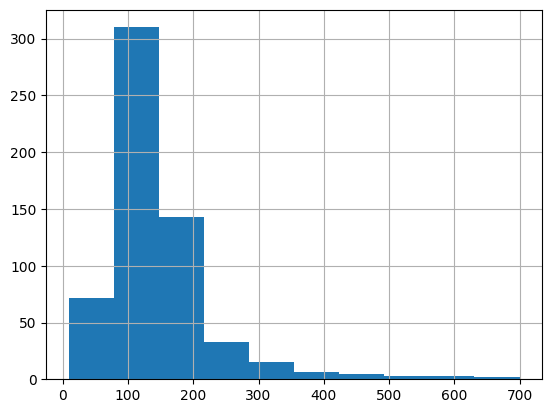

In [41]:
train_df.LoanAmount.hist()

In [42]:
median_loanamount=train_df.LoanAmount.median()
print(median_loanamount)

128.0


In [43]:
train_df.LoanAmount.fillna(median_loanamount,inplace=True)
test_df.LoanAmount.fillna(median_loanamount,inplace=True)

print(train_df.loc[104])
print(test_df.loc[11])

Gender                   Male
Married                   Yes
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          3816
CoapplicantIncome       754.0
LoanAmount              160.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 104, dtype: object
Gender                    Male
Married                    Yes
Dependents                   1
Education             Graduate
Self_Employed               No
ApplicantIncome           2185
CoapplicantIncome         1516
LoanAmount               162.0
Loan_Amount_Term         360.0
Credit_History             1.0
Property_Area        Semiurban
Name: 11, dtype: object


<ipython-input-43-93bfac42cfe9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.LoanAmount.fillna(median_loanamount,inplace=True)
<ipython-input-43-93bfac42cfe9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [44]:
train_df[train_df.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [45]:
test_df[test_df.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
45,Male,Yes,0,Graduate,No,4260,3900,185.0,NaN,NaN,Urban
48,Male,No,0,Graduate,No,6792,3338,187.0,NaN,1.0,Urban
117,Male,Yes,1,Graduate,No,1516,2900,80.0,NaN,0.0,Rural
129,Male,Yes,1,Not Graduate,No,3321,2088,70.0,NaN,1.0,Semiurban
184,Male,Yes,3+,Graduate,No,10166,750,150.0,NaN,1.0,Urban
214,Male,Yes,0,Not Graduate,No,3754,3719,118.0,NaN,1.0,Rural


In [46]:
median_Loan_Amount_Term=train_df.Loan_Amount_Term.mode()[0]
print(median_Loan_Amount_Term)

train_df.Loan_Amount_Term.fillna(median_Loan_Amount_Term,inplace=True)
test_df.Loan_Amount_Term.fillna(median_Loan_Amount_Term,inplace=True)

print(train_df.loc[3])
print(test_df.loc[25])

360.0
Gender                       Male
Married                       Yes
Dependents                      0
Education            Not Graduate
Self_Employed                  No
ApplicantIncome              2583
CoapplicantIncome          2358.0
LoanAmount                  120.0
Loan_Amount_Term            360.0
Credit_History                1.0
Property_Area               Urban
Loan_Status                     Y
Name: 3, dtype: object
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome             0
CoapplicantIncome       24000
LoanAmount              148.0
Loan_Amount_Term        360.0
Credit_History            0.0
Property_Area           Rural
Name: 25, dtype: object


<ipython-input-46-486618bc24eb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.Loan_Amount_Term.fillna(median_Loan_Amount_Term,inplace=True)
<ipython-input-46-486618bc24eb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [47]:
train_df.dropna(inplace=True)

In [48]:
train_df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
559,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
560,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
561,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
562,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [49]:
train_df[train_df.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [50]:
test_df[test_df.Credit_History.isnull()]


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
12,Male,No,3+,Graduate,No,4166,0,40.0,180.0,NaN,Urban
26,Male,Yes,2,Graduate,No,4363,1250,140.0,360.0,NaN,Urban
28,Male,Yes,0,Graduate,No,3772,833,57.0,360.0,NaN,Semiurban
45,Male,Yes,0,Graduate,No,4260,3900,185.0,360.0,NaN,Urban
90,Male,Yes,0,Graduate,Yes,3188,2286,130.0,360.0,NaN,Rural
99,Male,Yes,3+,Graduate,No,6835,0,188.0,360.0,NaN,Semiurban
104,Male,No,0,Graduate,No,2243,2233,107.0,360.0,NaN,Semiurban
115,Male,No,3+,Graduate,No,4243,4123,157.0,360.0,NaN,Semiurban
139,Female,No,3+,Graduate,No,4083,0,103.0,360.0,NaN,Semiurban


In [51]:
mode_Credit_History=train_df.Credit_History.mode()[0]
print(mode_Credit_History)

train_df.Credit_History.fillna(mode_Credit_History,inplace=True)
test_df.Credit_History.fillna(mode_Credit_History,inplace=True)

print(test_df.loc[31])

1.0
Gender                   Male
Married                   Yes
Dependents                  2
Education            Graduate
Self_Employed              No
ApplicantIncome          6250
CoapplicantIncome         820
LoanAmount              192.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Name: 31, dtype: object


<ipython-input-51-e6412ebf9cd0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.Credit_History.fillna(mode_Credit_History,inplace=True)
<ipython-input-51-e6412ebf9cd0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [52]:
train_df.isnull().sum().sum()

np.int64(0)

In [53]:
test_df.isnull().sum().sum()

np.int64(0)

In [54]:
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns



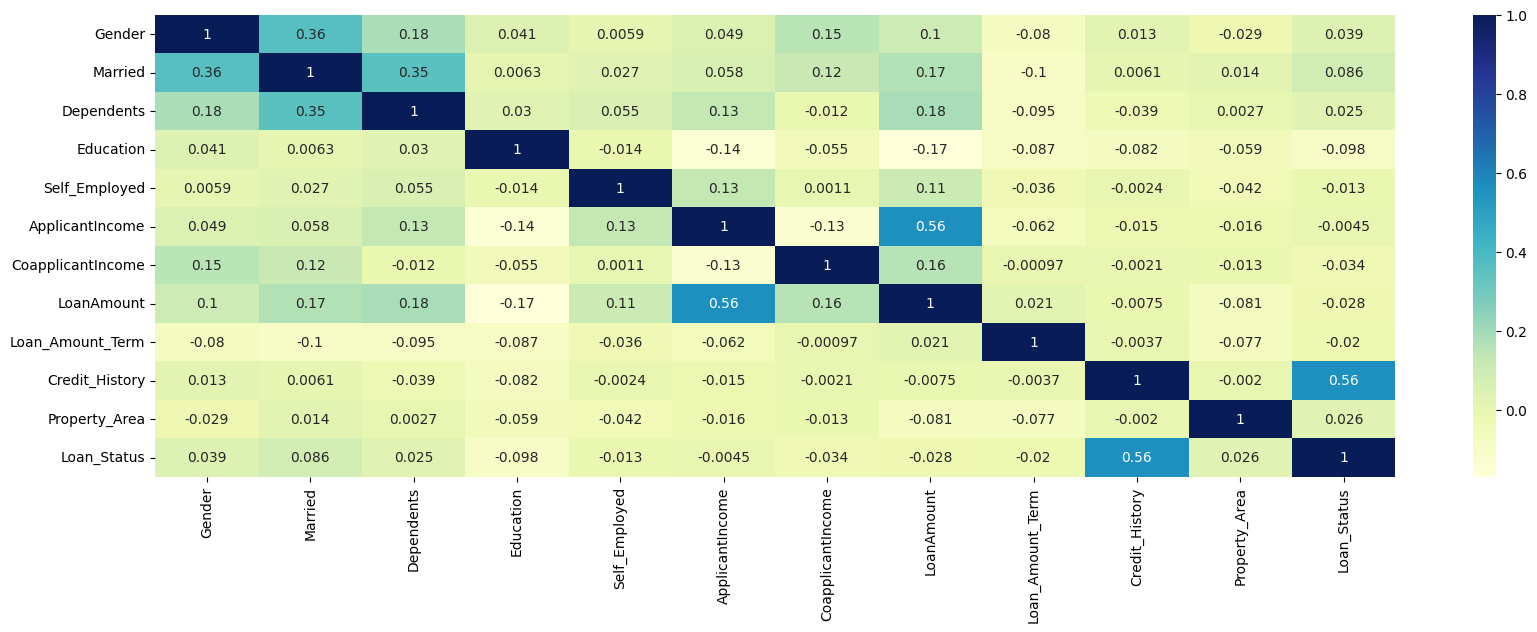

In [55]:
# Convert categorical features to numerical using Label Encoding
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = LabelEncoder().fit_transform(train_df[col])

plt.figure(figsize=(20,6))
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

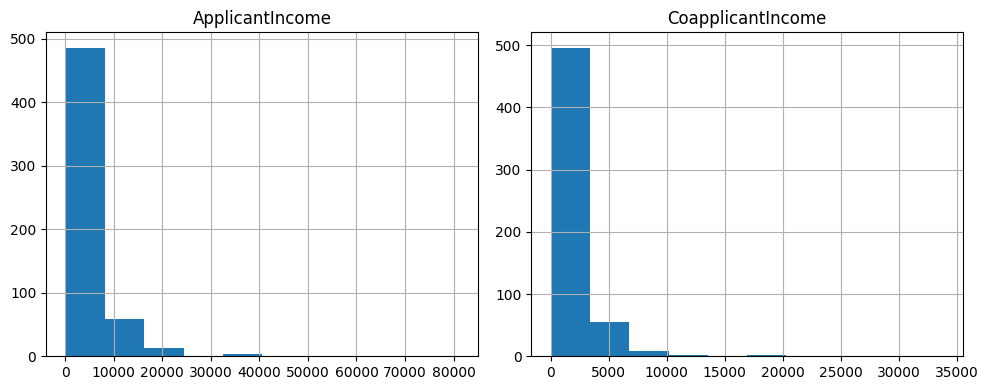

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
train_df.ApplicantIncome.hist()
plt.title('ApplicantIncome')
plt.subplot(1,2,2)
train_df.CoapplicantIncome.hist()
plt.title('CoapplicantIncome')
plt.tight_layout()
plt.show()

In [57]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [58]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [59]:
train_df.reset_index(drop=True,inplace=True)

In [60]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
560,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
561,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
562,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [61]:
cat_cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area']

In [62]:
for i in cat_cols:
    print(i)
    print('Train set:',sorted(train_df[i].unique()))
    print('Test set:',sorted(test_df[i].unique()))

Gender
Train set: [np.int64(0), np.int64(1)]
Test set: ['Female', 'Male']
Married
Train set: [np.int64(0), np.int64(1)]
Test set: ['No', 'Yes']
Dependents
Train set: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Test set: ['0', '1', '2', '3+']
Education
Train set: [np.int64(0), np.int64(1)]
Test set: ['Graduate', 'Not Graduate']
Self_Employed
Train set: [np.int64(0), np.int64(1)]
Test set: ['No', 'Yes']
Credit_History
Train set: [np.float64(0.0), np.float64(1.0)]
Test set: [np.float64(0.0), np.float64(1.0)]
Property_Area
Train set: [np.int64(0), np.int64(1), np.int64(2)]
Test set: ['Rural', 'Semiurban', 'Urban']


In [63]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore')
load_df_encoded = ohe.fit_transform(train_df[cat_cols]).toarray()
test_df_encoded = ohe.transform(test_df[cat_cols]).toarray()

load_df_encoded

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [64]:
len(load_df_encoded)

564

In [65]:
len(train_df)

564

In [66]:
loan_df=train_df.drop(cat_cols,axis=1);print(loan_df.shape)
test_df=test_df.drop(cat_cols,axis=1);print(test_df.shape)

(564, 5)
(367, 4)


In [67]:
loan_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,5849,0.0,128.0,360.0,1
1,4583,1508.0,128.0,360.0,0
2,3000,0.0,66.0,360.0,1
3,2583,2358.0,120.0,360.0,1
4,6000,0.0,141.0,360.0,1
...,...,...,...,...,...
559,2900,0.0,71.0,360.0,1
560,4106,0.0,40.0,180.0,1
561,8072,240.0,253.0,360.0,1
562,7583,0.0,187.0,360.0,1


In [68]:
loan_df=pd.concat([loan_df,pd.DataFrame(load_df_encoded, columns=ohe.get_feature_names_out(cat_cols))],axis=1);print(loan_df.shape)
test_df=pd.concat([test_df,pd.DataFrame(test_df_encoded, columns=ohe.get_feature_names_out(cat_cols))],axis=1);print(test_df.shape)

(564, 22)
(367, 21)


In [69]:
loan_df.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,...,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0.0,Credit_History_1.0,Property_Area_0,Property_Area_1,Property_Area_2
559,2900,0.0,71.0,360.0,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
560,4106,0.0,40.0,180.0,1,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
561,8072,240.0,253.0,360.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
562,7583,0.0,187.0,360.0,1,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
563,4583,0.0,133.0,360.0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [70]:
round(loan_df.Loan_Status.value_counts()/loan_df.shape[0]*100,2)

,count
Loan_Status,
1,68.26
0,31.74


In [71]:

# Identify target and features
target_column = train_df.columns[-1]
X = train_df.drop(columns=[target_column])
y = train_df[target_column]

In [72]:
# Encode categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [73]:
# Encode target variable if it's categorical
if y.dtype == 'object':
    target_encoder = LabelEncoder()
    y = target_encoder.fit_transform(y)

imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X = imputer.fit_transform(X)

In [74]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)  # Initialize SMOTE
X, y = smote.fit_resample(X, y)  # Resample data

In [75]:

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [76]:
# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Train models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000), # Increased max_iter
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boost": GradientBoostingClassifier()

}

In [78]:
# Hyperparameter tuning for Random Forest (example)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(models["Random Forest"], param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
models["Random Forest"] = grid_search_rf.best_estimator_

In [79]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 81.82%


In [80]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")

Logistic Regression Accuracy: 76.62%


In [81]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")

XGBoost Accuracy: 81.82%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:10:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [82]:
# AdaBoost Model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_val)
accuracy_ada = accuracy_score(y_val, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada * 100:.2f}%")

AdaBoost Accuracy: 85.71%


In [83]:
# Gradient Boost Model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print(f"Gradient Boost Accuracy: {accuracy_gb * 100:.2f}%")

Gradient Boost Accuracy: 81.17%


In [84]:
# SVM Model
from sklearn.svm import SVC # Import the SVC class
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 74.03%


In [85]:
# Identify the best model
accuracies = {
    "Random Forest": accuracy_rf,
    "Logistic Regression": accuracy_lr,
    "XGBoost": accuracy_xgb,
    "AdaBoost": accuracy_ada,
    "Gradient Boost": accuracy_gb,
    "SVM": accuracy_svm
}
best_model = max(accuracies, key=accuracies.get)
print(f"Best Model: {best_model} with Accuracy: {accuracies[best_model] * 100:.2f}%")


Best Model: AdaBoost with Accuracy: 85.71%


In [86]:
import pickle
with open('loan_status_model.pkl','wb') as f:
    pickle.dump(rf_model,f)

In [87]:
import json
# Get column names from the original train_df before preprocessing
columns = {
    'data_columns' : [col.lower() for col in train_df.drop(columns=[target_column]).columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [88]:
original_columns = train_df.drop(columns=[target_column]).columns
print(original_columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [89]:
train_df.Property_Area.value_counts()

,count
Property_Area,
1,217
2,182
0,165


In [91]:
!pip install streamlit
import streamlit as st
import numpy as np
import pandas as pd
import base64
import pickle

# Load model
model = pickle.load(open('loan_status_model.pkl', 'rb'))

# Page config
st.set_page_config(page_title="Loan Prediction App", layout="wide")

# === Function to add a background image === #
def add_bg_from_local(image_file):
    with open(image_file, "rb") as img_file:
        encoded = base64.b64encode(img_file.read()).decode()
    st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url("data:image/jpg;base64,{encoded}");
            background-size: cover;
            background-position: center;
            background-repeat: no-repeat;
        }}
        </style>
        """,
        unsafe_allow_html=True
    )

# Add the background image
add_bg_from_local('loan_image.jpg')  # Use your image file name

# Centered title
st.markdown("<h1 style='text-align: center; color: black;'>Loan Application Evaluator</h1>", unsafe_allow_html=True)

# Two-column layout
col1, col2 = st.columns(2)

with col1:
    gender = st.selectbox("Gender", ["Male", "Female"])
    married = st.selectbox("Marital Status", ["No", "Yes"])
    dependents = st.number_input("Number of Dependents", min_value=0, max_value=4)
    education = st.selectbox("Education", ["Not Graduate", "Graduate"])
    self_employed = st.selectbox("Self Employed", ["No", "Yes"])
    property_area = st.selectbox("Property Area", ["Rural", "Semiurban", "Urban"])

with col2:
    applicant_income = st.number_input("Applicant Income (in thousands)", min_value=0, value=0)
    coapplicant_income = st.number_input("Co-applicant Income (in thousands)", min_value=0, value=0)
    loan_amount = st.number_input("Loan Amount (in thousands)", min_value=0, value=0)
    loan_amount_term = st.number_input("Loan Amount Term (in months)", min_value=0, value=0)
    credit_history = st.selectbox("Credit History (0 = No history, 1 = Good history)", [0, 1])

# Dictionary of input
user_data = {
    'Gender': gender,
    'Married': married,
    'Dependents': dependents,
    'Education': education,
    'Self_Employed': self_employed,
    'ApplicantIncome': applicant_income,
    'CoapplicantIncome': coapplicant_income,
    'LoanAmount': loan_amount,
    'Loan_Amount_Term': loan_amount_term,
    'Credit_History': credit_history,
    'Property_Area': property_area
}

# Preprocessing
def preprocess_features(features):
    features.interpolate(method='linear', inplace=True)
    features['Gender'].fillna(features['Gender'].mode()[0], inplace=True)
    features['Married'].fillna(features['Married'].mode()[0], inplace=True)
    features['Dependents'].fillna(features['Dependents'].mode()[0], inplace=True)
    features['Self_Employed'].fillna(features['Self_Employed'].mode()[0], inplace=True)

    features.replace({'Married': {'No': 0, 'Yes': 1},
                      'Gender': {'Male': 1, 'Female': 0},
                      'Self_Employed': {'No': 0, 'Yes': 1},
                      'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
                      'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace=True)

    features = features.replace(to_replace='3+', value=4)
    return features

processed_data = preprocess_features(pd.DataFrame(user_data, index=[0]))

# Prediction
if st.button("Predict Loan Status"):
    prediction = model.predict(processed_data)

    if prediction[0] == 1:
        st.success("🎉 Congratulations! Your loan is likely to be approved.")
    else:
        st.error(" Sorry, your loan is likely to be rejected.")


2025-04-16 16:11:25.321 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 16:11:25.331 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 16:11:25.402 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-16 16:11:25.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 16:11:25.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 16:11:25.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-16 16:11:25.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn